# In this tutorial we'll see what to watch for during and after the network training

First let's look at at the training history - we want to display the training set loss and vlidation set loss as a function of iteration

In [1]:
from plot_utils import plot_utils

In [2]:
%matplotlib inline

In [3]:
%env PWD

'/home/wfedorko/NUPRISM-CNN'

You will need to change the location of where these files are

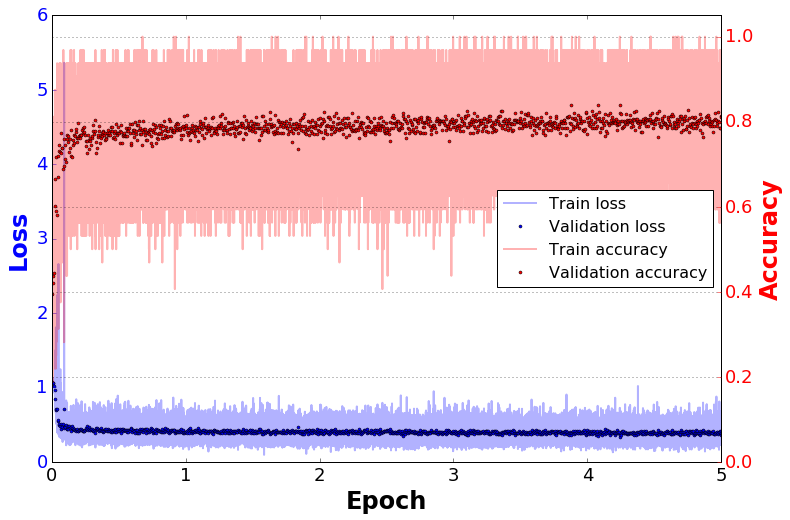

In [4]:
plot_utils.disp_learn_hist("model_state_dumps/20190619_194634/log_train.csv","model_state_dumps/20190619_194634/log_val.csv")


Why so bumpy?
   - there is 'noise' associated with batch-to-batch variation BUT
   - The main effect is actually the real bumpiness in the loss landscape being traversed during learning
   
To learn anything we need to smooth out the plot - for instance by using moving average

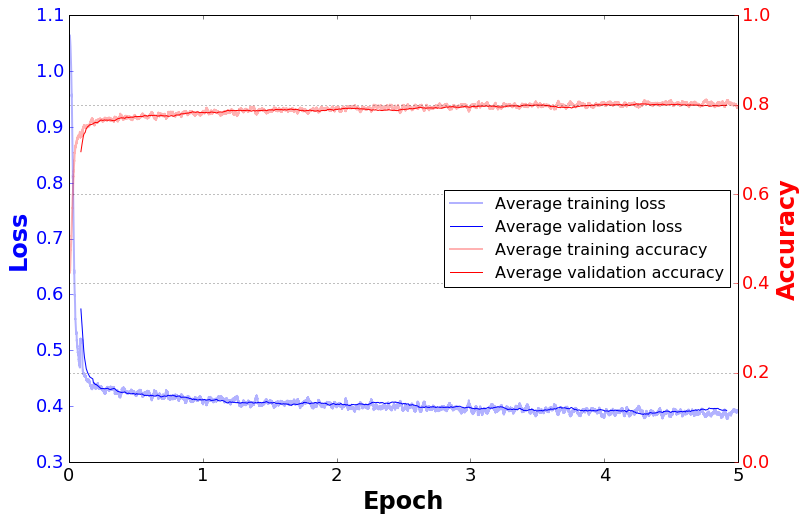

In [5]:
plot_utils.disp_learn_hist_smoothed("model_state_dumps/20190619_194634/log_train.csv","model_state_dumps/20190619_194634/log_val.csv")

This actually looks pretty good - we get initially a very quick learning and then a plateau. Both training and validation loss is still decreasing slightly and tracking - which means we could probably kept on training

Let's run training on a small sample to illustrate overtraining

In [6]:
from models.simpleCNN import SimpleCNN
model_CNN=SimpleCNN(num_input_channels=38,num_classes=3)

In [7]:
from io_utils.data_handling import WCH5Dataset

In [8]:
import numpy as np
def rotate_chan(x):
    return np.transpose(x,(2,0,1))

In [9]:
dset=WCH5Dataset("/fast_scratch/WatChMaL/data/IWCDmPMT/varyE/IWCDmPMT_varyE_100-1000MeV_300k_fmt.h5",reduced_dataset_size=20000,val_split=0.1,test_split=0.1,transform=rotate_chan)

Reduced size: 20000


In [10]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1024
config.batch_size_train = 32
config.batch_size_val = 1024
config.lr=0.001
config.device = 'gpu'
config.gpu_list = [0]
config.dump_path = 'model_state_dumps'

In [11]:
from training_utils.engine import Engine

In [12]:
engine=Engine(model_CNN,dset,config)

Requesting GPUs. GPU list : [0]
Main GPU: cuda:0
CUDA is available
Creating a directory for run dump: model_state_dumps/20190710_145234/


In [35]:
engine.train(epochs=20,report_interval=10,valid_interval=10)

Epoch 0 Starting @ 2019-07-10 12:41:41
... Iteration 1 ... Epoch 0.00 ... Loss 0.500 ... Accuracy 0.688
... Iteration 10 ... Epoch 0.02 ... Loss 0.417 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
best validation loss so far!: 0.4216357171535492
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNNBEST.pth
... Iteration 20 ... Epoch 0.04 ... Loss 0.331 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
best validation loss so far!: 0.40668562054634094
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNNBEST.pth
... Iteration 30 ... Epoch 0.06 ... Loss 0.460 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 40 ... Epoch 0.08 ... Loss 0.538 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 50 ... Epoch 0.10 ... Loss 0.524 ... Accuracy 0.656
Saved checkpoint as: model_state_dumps/201907

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 560 ... Epoch 1.12 ... Loss 0.351 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 570 ... Epoch 1.14 ... Loss 0.415 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 580 ... Epoch 1.16 ... Loss 0.282 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 590 ... Epoch 1.18 ... Loss 0.428 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 600 ... Epoch 1.20 ... Loss 0.437 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 610 ... Epoch 1.22 ... Loss 0.273 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 620 ... Epoch 1.24 ... Loss 0.274 ... Accuracy 0.938
Saved checkpoint as: model_state_dumps/20190710_

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1150 ... Epoch 2.30 ... Loss 0.344 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1160 ... Epoch 2.32 ... Loss 0.347 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1170 ... Epoch 2.34 ... Loss 0.349 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1180 ... Epoch 2.36 ... Loss 0.478 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1190 ... Epoch 2.38 ... Loss 0.251 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1200 ... Epoch 2.40 ... Loss 0.411 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1210 ... Epoch 2.42 ... Loss 0.365 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1750 ... Epoch 3.50 ... Loss 0.351 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1760 ... Epoch 3.52 ... Loss 0.403 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1770 ... Epoch 3.54 ... Loss 0.405 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1780 ... Epoch 3.56 ... Loss 0.492 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1790 ... Epoch 3.58 ... Loss 0.333 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1800 ... Epoch 3.60 ... Loss 0.321 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 1810 ... Epoch 3.62 ... Loss 0.328 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2350 ... Epoch 4.70 ... Loss 0.489 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2360 ... Epoch 4.72 ... Loss 0.467 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2370 ... Epoch 4.74 ... Loss 0.300 ... Accuracy 0.938
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2380 ... Epoch 4.76 ... Loss 0.531 ... Accuracy 0.688
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2390 ... Epoch 4.78 ... Loss 0.415 ... Accuracy 0.719
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2400 ... Epoch 4.80 ... Loss 0.306 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2410 ... Epoch 4.82 ... Loss 0.369 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2950 ... Epoch 5.90 ... Loss 0.503 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2960 ... Epoch 5.92 ... Loss 0.426 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2970 ... Epoch 5.94 ... Loss 0.423 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2980 ... Epoch 5.96 ... Loss 0.310 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 2990 ... Epoch 5.98 ... Loss 0.305 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 3000 ... Epoch 6.00 ... Loss 0.357 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
Epoch 6 Starting @ 2019-07-10 12:43:43
... Iteration 3001 ... Epoch 6.00 ... Loss 0.440 ... Accuracy 0.844
..

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 3540 ... Epoch 7.08 ... Loss 0.423 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 3550 ... Epoch 7.10 ... Loss 0.393 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 3560 ... Epoch 7.12 ... Loss 0.411 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 3570 ... Epoch 7.14 ... Loss 0.440 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 3580 ... Epoch 7.16 ... Loss 0.313 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 3590 ... Epoch 7.18 ... Loss 0.448 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 3600 ... Epoch 7.20 ... Loss 0.226 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4140 ... Epoch 8.28 ... Loss 0.422 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4150 ... Epoch 8.30 ... Loss 0.402 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4160 ... Epoch 8.32 ... Loss 0.339 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4170 ... Epoch 8.34 ... Loss 0.402 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4180 ... Epoch 8.36 ... Loss 0.387 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4190 ... Epoch 8.38 ... Loss 0.418 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4200 ... Epoch 8.40 ... Loss 0.507 ... Accuracy 0.719
Saved checkpoint as: model_state_dumps/20

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4740 ... Epoch 9.48 ... Loss 0.585 ... Accuracy 0.719
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4750 ... Epoch 9.50 ... Loss 0.372 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4760 ... Epoch 9.52 ... Loss 0.470 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4770 ... Epoch 9.54 ... Loss 0.312 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4780 ... Epoch 9.56 ... Loss 0.345 ... Accuracy 0.906
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4790 ... Epoch 9.58 ... Loss 0.361 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 4800 ... Epoch 9.60 ... Loss 0.317 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5330 ... Epoch 10.66 ... Loss 0.380 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5340 ... Epoch 10.68 ... Loss 0.368 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5350 ... Epoch 10.70 ... Loss 0.389 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5360 ... Epoch 10.72 ... Loss 0.305 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5370 ... Epoch 10.74 ... Loss 0.393 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5380 ... Epoch 10.76 ... Loss 0.241 ... Accuracy 0.938
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5390 ... Epoch 10.78 ... Loss 0.391 ... Accuracy 0.875
Saved checkpoint as: model_state_d

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5920 ... Epoch 11.84 ... Loss 0.336 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5930 ... Epoch 11.86 ... Loss 0.328 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5940 ... Epoch 11.88 ... Loss 0.345 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5950 ... Epoch 11.90 ... Loss 0.362 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5960 ... Epoch 11.92 ... Loss 0.325 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5970 ... Epoch 11.94 ... Loss 0.326 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 5980 ... Epoch 11.96 ... Loss 0.339 ... Accuracy 0.844
Saved checkpoint as: model_state_d

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
Epoch 13 Starting @ 2019-07-10 12:46:05
... Iteration 6501 ... Epoch 13.00 ... Loss 0.379 ... Accuracy 0.844
... Iteration 6510 ... Epoch 13.02 ... Loss 0.322 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 6520 ... Epoch 13.04 ... Loss 0.389 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 6530 ... Epoch 13.06 ... Loss 0.336 ... Accuracy 0.938
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 6540 ... Epoch 13.08 ... Loss 0.300 ... Accuracy 0.906
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 6550 ... Epoch 13.10 ... Loss 0.429 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 6560 ... Epoch 13.12 ... Loss 0.486 ... Accuracy 0.688
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCN

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7090 ... Epoch 14.18 ... Loss 0.216 ... Accuracy 0.938
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7100 ... Epoch 14.20 ... Loss 0.325 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7110 ... Epoch 14.22 ... Loss 0.361 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7120 ... Epoch 14.24 ... Loss 0.479 ... Accuracy 0.688
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7130 ... Epoch 14.26 ... Loss 0.362 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7140 ... Epoch 14.28 ... Loss 0.351 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7150 ... Epoch 14.30 ... Loss 0.303 ... Accuracy 0.844
Saved checkpoint as: model_state_d

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7670 ... Epoch 15.34 ... Loss 0.353 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7680 ... Epoch 15.36 ... Loss 0.340 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7690 ... Epoch 15.38 ... Loss 0.514 ... Accuracy 0.688
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7700 ... Epoch 15.40 ... Loss 0.441 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7710 ... Epoch 15.42 ... Loss 0.432 ... Accuracy 0.844
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7720 ... Epoch 15.44 ... Loss 0.434 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 7730 ... Epoch 15.46 ... Loss 0.255 ... Accuracy 0.906
Saved checkpoint as: model_state_d

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8260 ... Epoch 16.52 ... Loss 0.176 ... Accuracy 0.969
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8270 ... Epoch 16.54 ... Loss 0.545 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8280 ... Epoch 16.56 ... Loss 0.221 ... Accuracy 0.906
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8290 ... Epoch 16.58 ... Loss 0.550 ... Accuracy 0.719
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8300 ... Epoch 16.60 ... Loss 0.442 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8310 ... Epoch 16.62 ... Loss 0.440 ... Accuracy 0.750
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8320 ... Epoch 16.64 ... Loss 0.413 ... Accuracy 0.844
Saved checkpoint as: model_state_d

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8850 ... Epoch 17.70 ... Loss 0.374 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8860 ... Epoch 17.72 ... Loss 0.342 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8870 ... Epoch 17.74 ... Loss 0.308 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8880 ... Epoch 17.76 ... Loss 0.392 ... Accuracy 0.781
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8890 ... Epoch 17.78 ... Loss 0.393 ... Accuracy 0.812
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8900 ... Epoch 17.80 ... Loss 0.249 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 8910 ... Epoch 17.82 ... Loss 0.380 ... Accuracy 0.781
Saved checkpoint as: model_state_d

Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 9440 ... Epoch 18.88 ... Loss 0.207 ... Accuracy 0.938
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 9450 ... Epoch 18.90 ... Loss 0.181 ... Accuracy 0.875
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 9460 ... Epoch 18.92 ... Loss 0.278 ... Accuracy 0.938
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 9470 ... Epoch 18.94 ... Loss 0.240 ... Accuracy 0.906
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 9480 ... Epoch 18.96 ... Loss 0.592 ... Accuracy 0.656
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 9490 ... Epoch 18.98 ... Loss 0.239 ... Accuracy 0.906
Saved checkpoint as: model_state_dumps/20190710_124134/SimpleCNN.pth
... Iteration 9500 ... Epoch 19.00 ... Loss 0.309 ... Accuracy 0.844
Saved checkpoint as: model_state_d

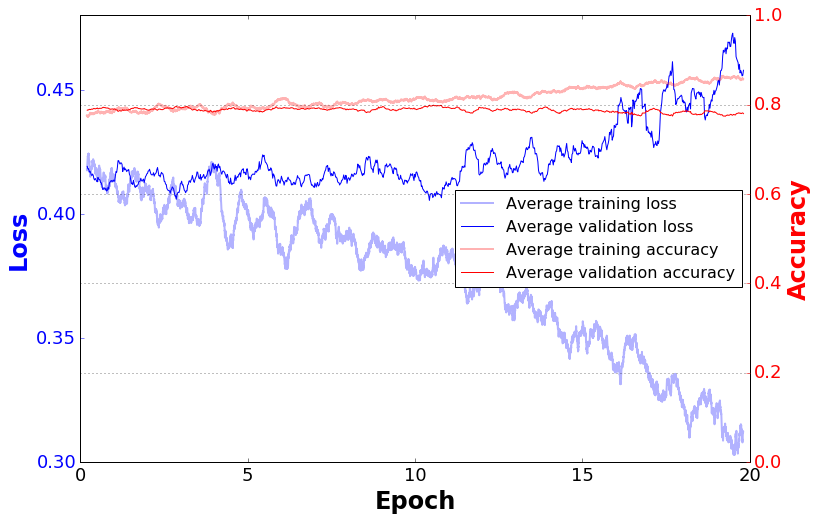

In [14]:
#model_state_dumps/20190710_123405
plot_utils.disp_learn_hist_smoothed("model_state_dumps/20190710_124134/log_train.csv","model_state_dumps/20190710_124134/log_val.csv",window_train=200,window_val=20)

Now let's go back to the full dataset and load the model trained two weeks ago on the full dataset

In [15]:
dset=WCH5Dataset("/fast_scratch/WatChMaL/data/IWCDmPMT/varyE/IWCDmPMT_varyE_100-1000MeV_300k_fmt.h5",val_split=0.1,test_split=0.1,transform=rotate_chan)

In [16]:
!ls model_state_dumps/20190619_194634/

SimpleCNN.pth	   config_log.txt  log_train.csv  predictions.npy
SimpleCNNBEST.pth  labels.npy	   log_val.csv	  softmax.npy


In [17]:
engine=Engine(model_CNN,dset,config)

Requesting GPUs. GPU list : [0]
Main GPU: cuda:0
CUDA is available
Creating a directory for run dump: model_state_dumps/20190710_145257/


In [18]:
engine.restore_state("model_state_dumps/20190619_194634/SimpleCNNBEST.pth")

Restoring state from model_state_dumps/20190619_194634/SimpleCNNBEST.pth
Restoration complete.


In [19]:
engine.dirpath="model_state_dumps/20190619_194634/"

In [19]:
engine.validate()

val_iterations : 0
val_iterations : 1
val_iterations : 2
val_iterations : 3
val_iterations : 4
val_iterations : 5
val_iterations : 6
val_iterations : 7
val_iterations : 8
val_iterations : 9
val_iterations : 10
val_iterations : 11
val_iterations : 12
val_iterations : 13
val_iterations : 14
val_iterations : 15
val_iterations : 16
val_iterations : 17
val_iterations : 18
val_iterations : 19
val_iterations : 20
val_iterations : 21
val_iterations : 22
val_iterations : 23
val_iterations : 24
val_iterations : 25
val_iterations : 26
val_iterations : 27
val_iterations : 28
val_iterations : 29
val_iterations : 30
val_iterations : 31
val_iterations : 32
val_iterations : 33
val_iterations : 34
val_iterations : 35
val_iterations : 36
val_iterations : 37
val_iterations : 38
val_iterations : 39
val_iterations : 40
val_iterations : 41
val_iterations : 42
val_iterations : 43
val_iterations : 44
val_iterations : 45
val_iterations : 46
val_iterations : 47
val_iterations : 48
val_iterations : 49
val_iterat

In [20]:
labels_val=np.load(engine.dirpath + "labels.npy")
predictions_val=np.load(engine.dirpath + "predictions.npy")
softmax_out_val=np.load(engine.dirpath + "softmax.npy")

In [21]:
from matplotlib import pyplot as plt
def plot_resp(labels,softmax_out):
    fig1, ax1 = plt.subplots(figsize=(12,8),facecolor="w")
    ax1.tick_params(axis="both", labelsize=20)
    softmax_out_val_gamma_Pe=softmax_out_val[labels_val==0][:,1]
    softmax_out_val_e_Pe=softmax_out_val[labels_val==1][:,1]
    
    bins=np.linspace(0.0,1.0,51)
    values, bins, patches = ax1.hist(softmax_out_val_gamma_Pe, bins=bins, 
                                    label= 'gamma', color='blue', density=True,
                                    alpha=0.3)
    
    values, bins, patches = ax1.hist(softmax_out_val_e_Pe, bins=bins, 
                                    label= 'electron', color='red', density=True,
                                    alpha=0.3)
    ax1.legend(prop={'size': 16})
    ax1.set_xlabel('$P(e)$',fontweight='bold',fontsize=24,color='black')
    
    fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
    ax2.tick_params(axis="both", labelsize=20)
    softmax_out_val_e_Pmu=softmax_out_val[labels_val==1][:,2]
    softmax_out_val_mu_Pmu=softmax_out_val[labels_val==2][:,2]
    
    values, bins, patches = ax2.hist(softmax_out_val_mu_Pmu, bins=bins, 
                                    label= 'muon', color='green', density=True,
                                    alpha=0.3)
    
    values, bins, patches = ax2.hist(softmax_out_val_e_Pmu, bins=bins, 
                                    label= 'electron', color='red', density=True,
                                    alpha=0.3, log=True)
    ax2.legend(prop={'size': 16})
    ax2.set_xlabel('$P(\mu)$',fontweight='bold',fontsize=24,color='black')
    
    
    
    plt.show()

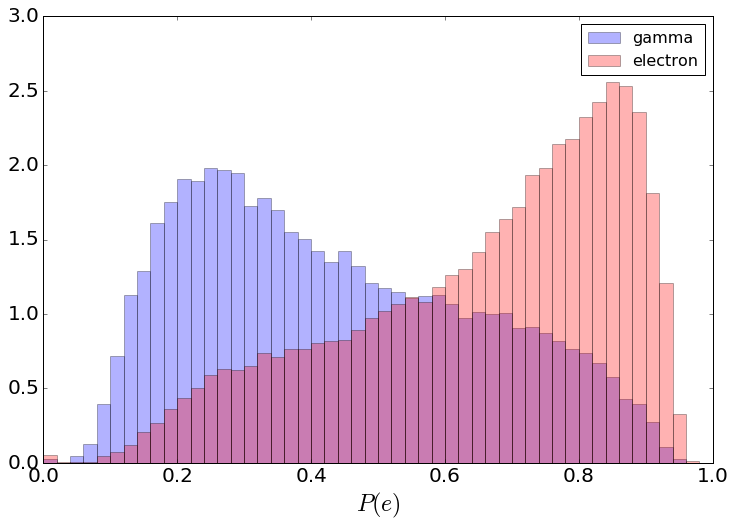

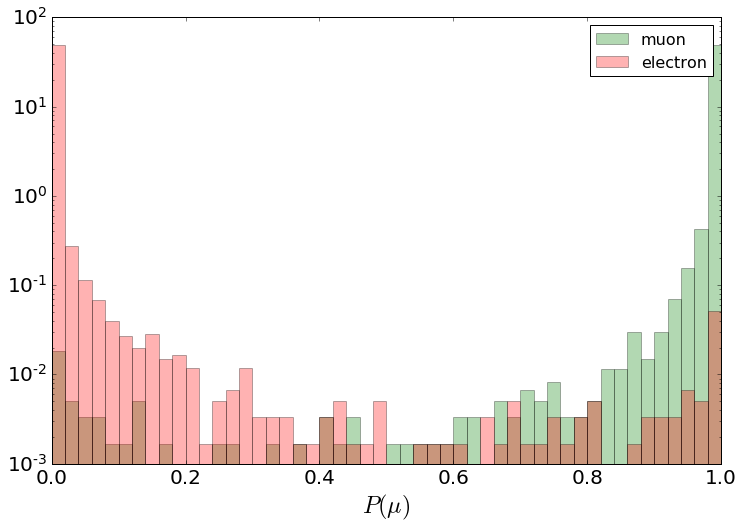

In [22]:
plot_resp(labels_val,softmax_out_val)

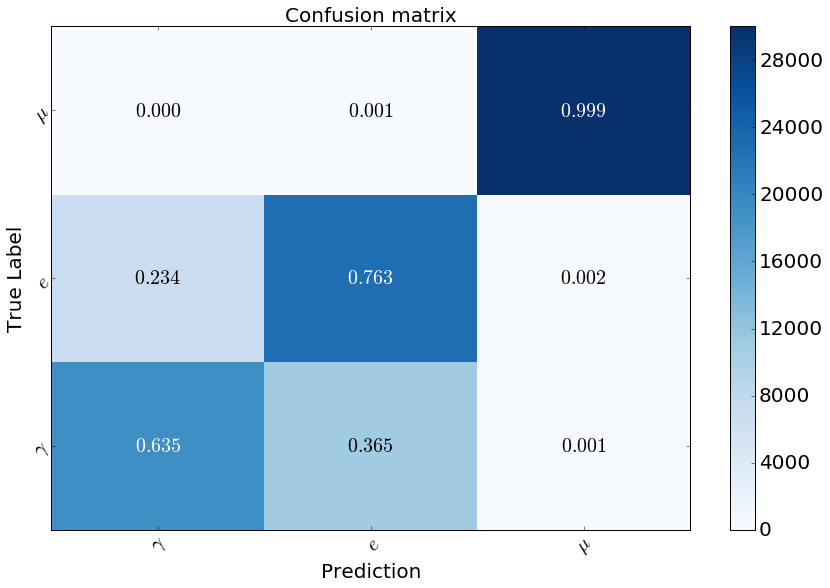

In [23]:
plot_utils.plot_confusion_matrix(labels_val, predictions_val, ['$\gamma$','$e$','$\mu$'])